
0: 640x640 1 0, 2 5s, 198.5ms
Speed: 0.0ms preprocess, 198.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


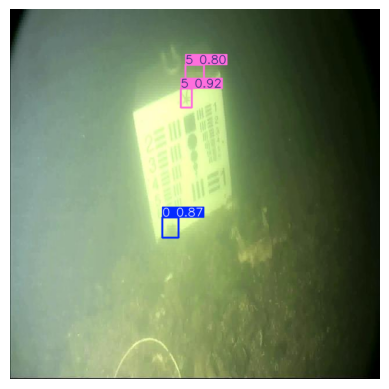


0: 384x640 2 0s, 1 5, 99.5ms
Speed: 0.0ms preprocess, 99.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 108.6ms
Speed: 0.0ms preprocess, 108.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 108.9ms
Speed: 0.0ms preprocess, 108.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 0, 1 5, 98.8ms
Speed: 0.0ms preprocess, 98.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 107.7ms
Speed: 0.0ms preprocess, 107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 0, 1 5, 91.9ms
Speed: 1.7ms preprocess, 91.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 96.9ms
Speed: 1.6ms preprocess, 96.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 99.4ms
Speed: 0.0ms preprocess, 99.4ms inference, 0.0ms postprocess per image at sha

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Load the trained model
model = YOLO(r'C:\Users\swath\OneDrive\Desktop\u\best (2).pt')

# Define the detection pipeline function for images
def detection_pipeline(image_paths):
    # Run the model on the images
    outputs = model(image_paths)
    
    # Visualize the results for each image
    for i, output in enumerate(outputs):
        # Convert BGR (OpenCV) image to RGB (PIL) for displaying with matplotlib
        im_bgr = output.plot()  # Get the image with bounding boxes
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert BGR to RGB

        # Plot the image
        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

# Define the detection pipeline function for videos
def video_detection_pipeline(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video dimensions and set up video writer (optional, for saving results)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break  # Break when the video ends

        # Run YOLO model on each frame
        outputs = model(frame)

        # Draw bounding boxes and labels on the frame
        frame_with_boxes = outputs[0].plot()

        # Display the frame with bounding boxes
        cv2.imshow('YOLO Detection', frame_with_boxes)

        # Write the frame to the output video (optional)
        out.write(frame_with_boxes)

        # Press 'q' to exit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and writer
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage with an image
test_imgs = [r"C:\Users\swath\OneDrive\Desktop\u\datasets\test\images\2019-03-21_07-08-28to2019-03-21_07-08-35_1-0031_jpg.rf.9d2eaf37155f5d83adbde784b9a75ccd.jpg"]
detection_pipeline(test_imgs)

# Example usage with a .avi video
test_video = r"C:\Users\swath\OneDrive\Desktop\u\crab.avi"
video_detection_pipeline(test_video)



0: 640x640 1 0, 2 5s, 179.6ms
Speed: 3.0ms preprocess, 179.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


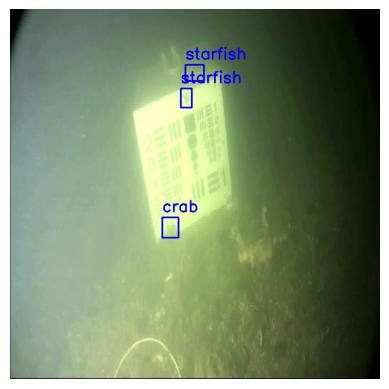


0: 384x640 2 0s, 1 5, 108.4ms
Speed: 0.0ms preprocess, 108.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 104.9ms
Speed: 0.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 116.6ms
Speed: 0.7ms preprocess, 116.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 0, 1 5, 96.5ms
Speed: 2.8ms preprocess, 96.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 102.3ms
Speed: 2.4ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 0, 1 5, 100.7ms
Speed: 12.6ms preprocess, 100.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 95.8ms
Speed: 2.5ms preprocess, 95.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 5, 112.5ms
Speed: 0.0ms preprocess, 112.5ms inference, 0.0ms postprocess per image

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Load the trained model
model = YOLO(r'C:\Users\swath\OneDrive\Desktop\u\best (2).pt')

# Define the class labels
class_labels = {
    0: "crab",
    1: "fish",
    2: "jellyfish",
    3: "shrimp",
    4: "small fish",
    5: "starfish"
}

# Define the detection pipeline function for images
def detection_pipeline(image_paths):
    for image_path in image_paths:
        # Load image using OpenCV
        img = cv2.imread(image_path)

        # Run the model on the image
        results = model(img)

        # Iterate over each detection in the results
        for result in results:
            for box in result.boxes:
                # Get the predicted class ID
                class_id = int(box.cls)

                # Get the class label from the dictionary
                class_label = class_labels.get(class_id, 'Unknown')

                # Get the bounding box coordinates
                bbox = box.xyxy[0].cpu().numpy()  # [x_min, y_min, x_max, y_max]

                # Draw the bounding box and label on the image
                img = cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2)
                cv2.putText(img, class_label, (int(bbox[0]), int(bbox[1]) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Convert BGR (OpenCV) image to RGB for displaying with matplotlib
        im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Plot the image
        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

# Define the detection pipeline function for videos
def video_detection_pipeline(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video dimensions and set up video writer (optional, for saving results)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break  # Break when the video ends

        # Run YOLO model on each frame
        results = model(frame)

        # Draw bounding boxes and labels on the frame
        for result in results:
            for box in result.boxes:
                # Get the predicted class ID
                class_id = int(box.cls)

                # Get the class label from the dictionary
                class_label = class_labels.get(class_id, 'Unknown')

                # Get the bounding box coordinates
                bbox = box.xyxy[0].cpu().numpy()

                # Draw bounding box and label on the frame
                frame = cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2)
                cv2.putText(frame, class_label, (int(bbox[0]), int(bbox[1]) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display the frame with bounding boxes
        cv2.imshow('YOLO Detection', frame)

        # Write the frame to the output video (optional)
        out.write(frame)

        # Press 'q' to exit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and writer
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage with an image
test_imgs = [r"C:\Users\swath\OneDrive\Desktop\u\datasets\test\images\2019-03-21_07-08-28to2019-03-21_07-08-35_1-0031_jpg.rf.9d2eaf37155f5d83adbde784b9a75ccd.jpg"]
detection_pipeline(test_imgs)

# Example usage with a .avi video
test_video = r"C:\Users\swath\OneDrive\Desktop\u\crab.avi"
video_detection_pipeline(test_video)
